## Angewandtes Quantencomputing Laborpraktikum WiSe 25/26

### Musterlösung zu Praktikum 4: Logische Quantengatter (31.10.2025)

2-Qubit Quantengatter lassen sich in Qiskit folgendermaßen nutzen. Achten sie auf die unterschiedliche Visualisierung in ``draw``.

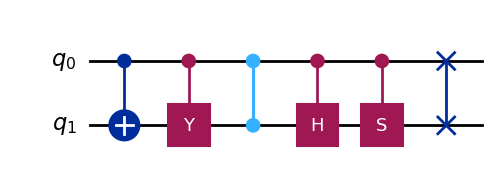

In [27]:
from qiskit import QuantumCircuit

quantum_circuit = QuantumCircuit(2)
quantum_circuit.cx(0, 1) # CNOT / kontrolliertes X-Gatter mit Kontrollqubit 0 und Zielqubit 1
quantum_circuit.cy(0, 1) # Kontrolliertes Y-Gatter mit Kontrollqubit 0 und Zielqubit 1
quantum_circuit.cz(0, 1) # Kontrolliertes Z-Gatter mit Kontrollqubit 0 und Zielqubit 1
quantum_circuit.ch(0, 1) # Kontrolliertes H-Gatter mit Kontrollqubit 0 und Zielqubit 1
quantum_circuit.cs(0, 1) # Kontrolliertes S-Gatter mit Kontrollqubit 0 und Zielqubit 1
quantum_circuit.swap(0, 1) # SWAP-Gatter zwischen Qubit 0 und Qubit 1
display(quantum_circuit.draw('mpl'))

Auch Rotationsgatter können kontrolliert werden.

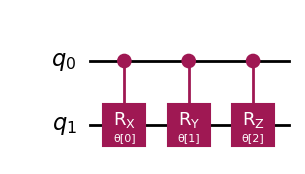

In [28]:
from qiskit.circuit import ParameterVector

p = ParameterVector('θ', length=3)

quantum_circuit = QuantumCircuit(2)
quantum_circuit.crx(p[0], 0, 1) # Kontrolliertes RX-Gatter mit Winkel p[0]
quantum_circuit.cry(p[1], 0, 1) # Kontrolliertes RY-Gatter mit Winkel p[1]
quantum_circuit.crz(p[2], 0, 1) # Kontrolliertes RZ-Gatter mit Winkel p[2]
display(quantum_circuit.draw('mpl'))


Qubits mit mehrfacher Kontrolle lassen sich wie folgt implementieren:

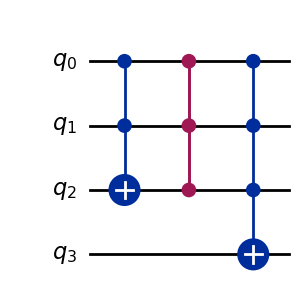

In [29]:
quantum_circuit = QuantumCircuit(4)
quantum_circuit.ccx(0, 1, 2) # Toffoli-Gatter mit Kontrollqubits 0, 1 und Zielqubit 2
quantum_circuit.ccz(0, 1, 2) # Zweifach Kontrolliertes Z-Gatter mit Kontrollqubits 0, 1 und Zielqubit 2
quantum_circuit.mcx(control_qubits=[0, 1,2], target_qubit=3) # Mehrfach-CNOT Gatter mit Kontrollqubits 0, 1 und Zielqubit 1
display(quantum_circuit.draw('mpl'))

### Aufgabe 1: Kontrollierende Quantengatter

Der Bell-Zustand $\ket{\Psi} = \frac{\sqrt{2}}{2}\ket{00} + \frac{\sqrt{2}}{2}\ket{11}$ kann folgendermaßen Implementiert werden:

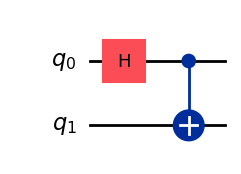

<IPython.core.display.Math object>

In [30]:
from qc_lecture_tools.statevector import sv_state

quantum_circuit = QuantumCircuit(2)
quantum_circuit.h(0)
quantum_circuit.cx(0, 1)
display(quantum_circuit.draw('mpl'))
display(sv_state(quantum_circuit, "Quantenzustand: "))

**Aufgabe 1.1:** Finden Sie einen Schaltkreis um folgenden Quantenzustands zu erstellen: $\ket{\Psi} = \frac{\sqrt{2}}{2} \ket{01} + \frac{\sqrt{2}}{2}\ket{10}$

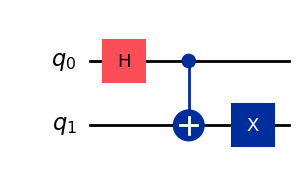

<IPython.core.display.Math object>

In [31]:
quantum_circuit = QuantumCircuit(2)
quantum_circuit.h(0)
quantum_circuit.cx(0,1)
quantum_circuit.x(1)
display(quantum_circuit.draw('mpl'))
display(sv_state(quantum_circuit, "Quantenzustand: "))

**Aufgabe 1.2:** Finden Sie eine Schaltkreis der folgenden Zustand präpariert: $\Psi = \frac{\sqrt{2}}{2} \ket{01} + \frac{\sqrt{2}i}{2}\ket{11}$

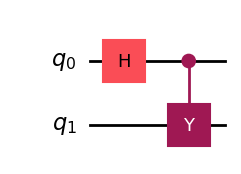

<IPython.core.display.Math object>

In [32]:
quantum_circuit = QuantumCircuit(2)
quantum_circuit.h(0)
quantum_circuit.cy(0,1)
display(quantum_circuit.draw('mpl'))
display(sv_state(quantum_circuit, "Quantenzustand:"))

**Aufgabe 1.3:** Warum spielt des beim kontrolliertes Z-Gatter keine Rolle, was Ziel- und was Kontrollqubit ist? Schauen Sie sich dazu die Wirkung auf alle Quantenzustände an (gleichmäßige Superposition reicht).

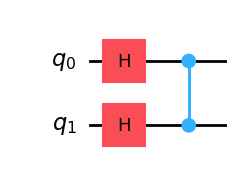

<IPython.core.display.Math object>

In [33]:
quantum_circuit = QuantumCircuit(2)
quantum_circuit.h(0)
quantum_circuit.h(1)
quantum_circuit.cz(0,1)
display(quantum_circuit.draw('mpl'))
display(sv_state(quantum_circuit, "Quantenzustand: \Psi="))

**Beobachtung:** Da sowohl Ziel- als auch Kontrollqubit müssen 1 sein, um eine Wirkung zu erzielen, spielt es keine Rolle, welches Ziel- und welches Kontrollqubit ist. 

**Aufgabe 1.4:** Untersuchen Sie die Wirkung des SWAP-Gatters auf die einzelnen Basis Zustände $\ket{00},\ldots,\ket{11}$.
Was passiert nach den einzelnen CNOT-Gattern?

Das SWAP-Gatter lässt sich durch drei aufeinanderfolgende CNOT Gatter implementieren. Das Kontrol- und Ziel-Qubit wechseln sich dabei ab. 

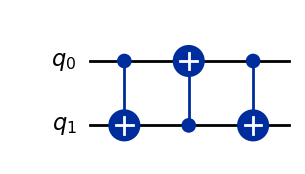

In [34]:
# Schaltkreis für das SWAP Gatter
quantum_circuit = QuantumCircuit(2)
quantum_circuit.cx(0,1)
quantum_circuit.cx(1,0)
quantum_circuit.cx(0,1)
display(quantum_circuit.draw('mpl'))

In [35]:
quantum_circuit = QuantumCircuit(2)

quantum_circuit.cx(0,1)
print("00 Nach dem erstem CNOT Gatter:")
display(sv_state(quantum_circuit,"\Psi="))
quantum_circuit.cx(1,0)
print("00 Nach dem zweiten CNOT Gatter:")
display(sv_state(quantum_circuit,"\Psi="))
quantum_circuit.cx(0,1)
print("00 Nach dem dritten CNOT Gatter:")
display(sv_state(quantum_circuit, "\Psi="))

00 Nach dem erstem CNOT Gatter:


<IPython.core.display.Math object>

00 Nach dem zweiten CNOT Gatter:


<IPython.core.display.Math object>

00 Nach dem dritten CNOT Gatter:


<IPython.core.display.Math object>

In [36]:
quantum_circuit = QuantumCircuit(2)
quantum_circuit.x(0)

quantum_circuit.cx(0,1)
print("10 Nach dem erstem CNOT Gatter:")
display(sv_state(quantum_circuit,"\Psi="))
quantum_circuit.cx(1,0)
print("10 Nach dem zweiten CNOT Gatter:")
display(sv_state(quantum_circuit,"\Psi="))
quantum_circuit.cx(0,1)
print("10 Nach dem dritten CNOT Gatter:")
display(sv_state(quantum_circuit, "\Psi="))

10 Nach dem erstem CNOT Gatter:


<IPython.core.display.Math object>

10 Nach dem zweiten CNOT Gatter:


<IPython.core.display.Math object>

10 Nach dem dritten CNOT Gatter:


<IPython.core.display.Math object>

In [37]:
quantum_circuit = QuantumCircuit(2)
quantum_circuit.x(1)

quantum_circuit.cx(0,1)
print("01 Nach dem erstem CNOT Gatter:")
display(sv_state(quantum_circuit,"\Psi="))
quantum_circuit.cx(1,0)
print("01 Nach dem zweiten CNOT Gatter:")
display(sv_state(quantum_circuit,"\Psi="))
quantum_circuit.cx(0,1)
print("01 Nach dem dritten CNOT Gatter:")
display(sv_state(quantum_circuit, "\Psi="))

01 Nach dem erstem CNOT Gatter:


<IPython.core.display.Math object>

01 Nach dem zweiten CNOT Gatter:


<IPython.core.display.Math object>

01 Nach dem dritten CNOT Gatter:


<IPython.core.display.Math object>

In [38]:
quantum_circuit = QuantumCircuit(2)
quantum_circuit.x(0)
quantum_circuit.x(1)

quantum_circuit.cx(0,1)
print("11 Nach dem erstem CNOT Gatter:")
display(sv_state(quantum_circuit,"\Psi="))
quantum_circuit.cx(1,0)
print("11 Nach dem zweiten CNOT Gatter:")
display(sv_state(quantum_circuit,"\Psi="))
quantum_circuit.cx(0,1)
print("11 Nach dem dritten CNOT Gatter:")
display(sv_state(quantum_circuit, "\Psi="))


11 Nach dem erstem CNOT Gatter:


<IPython.core.display.Math object>

11 Nach dem zweiten CNOT Gatter:


<IPython.core.display.Math object>

11 Nach dem dritten CNOT Gatter:


<IPython.core.display.Math object>

### Aufgabe 2: Impelementierung klassischer logischer Gatter

**Aufgabenstellung:** Realisieren Sie die bekannten klassischen Gatter wie das AND, XOR, OR und NAND sowie eine Gleichheitsüberprüfung (=) mit den Quantengattern. 
Für die Implementierung werden drei Qubits genutzt: die ersten zwei Qubits dienen als Input (A und B), das dritte Qubit als Output des Gatters.
Sie benötigen dafür nur das X-, CX- und CCX-Gatter. 

Um die Wirkung des Gatters zu analysieren, wenden Sie ihre Implementierung auf den gleichverteilten Superpositionszustand an:

$\ket{\Psi} = \frac{1}{2} \ket{000} + \frac{1}{2} \ket{010} + \frac{1}{2} \ket{100} + \frac{1}{2} \ket{110}$

**Hinweis:** Die Logikgatter haben folgende Definition

<table>
<tr>
<td>

**AND**

|  A |  B |  A AND B |
|---------|---------|------------------|
|    0    |    0    |        0         |
|    0    |    1    |        0         |
|    1    |    0    |        0         |
|    1    |    1    |        1         |

</td>
<td>

**XOR**

|  A |  B |  A XOR B |
|---------|---------|------------------|
|    0    |    0    |        0         |
|    0    |    1    |        1         |
|    1    |    0    |        1         |
|    1    |    1    |        0         |

</td>
<td>

**OR**

|  A |  B |  A OR B  |
|---------|---------|------------------|
|    0    |    0    |        0         |
|    0    |    1    |        1         |
|    1    |    0    |        1         |
|    1    |    1    |        1         |

</td>
<td>

**NAND**

|  A |  B |  A NAND B|
|---------|---------|------------------|
|    0    |    0    |        1         |
|    0    |    1    |        1         |
|    1    |    0    |        1         |
|    1    |    1    |        0         |

</td>
<td>

**Gleichheit (=)**

|  A |  B |  A = B   |
|---------|---------|------------------|
|    0    |    0    |        1         |
|    0    |    1    |        0         |
|    1    |    0    |        0         |
|    1    |    1    |        1         |

</td>
</tr>
</table>

Um die Gatter Implementierung schnell zu überprüfen, nutzen wir eine gleichverteilte Superposition der ersten zwei Qubits: 

In [39]:
# Wir definieren uns zunächst den Superpositions Schaltkreis 
qc_test = QuantumCircuit(3)
qc_test.h(0)
qc_test.h(1)
sv_state(qc_test, "Input~Zustand:~\Psi=")

<IPython.core.display.Math object>

Schaltkreise in Qiskit können mit der Funktion ``compose`` hintereinander angehängt werden:  

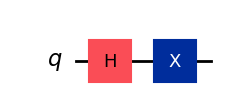

In [40]:
# Schaltkreis 1
quantum_circuit1 = QuantumCircuit(1)
quantum_circuit1.h(0)

# Schaltkreis 2
quantum_circuit2 = QuantumCircuit(1)
quantum_circuit2.x(0)

# Schaltkreis 1 + Schaltkreis 2
quantum_circuit3 = quantum_circuit1.compose(quantum_circuit2)
display(quantum_circuit3.draw('mpl'))

**Aufgabe 2.1:** AND Gatter

In [41]:
# Das AND Gatter lässt sich einfach mit einem Toffoli-Gatter (CCX Gatter) realisieren:

and_qc = QuantumCircuit(3)
and_qc.ccx(0,1,2)

sv_state(qc_test.compose(and_qc))

<IPython.core.display.Math object>

**Aufgabe 2.2:** XOR Gatter

In [42]:
# Das XOR Gatter lässt sich mit zwei CNOT Gattern realisieren

xor_qc = QuantumCircuit(3)
xor_qc.cx(0,2)
xor_qc.cx(1,2)

sv_state(qc_test.compose(xor_qc))

<IPython.core.display.Math object>

**Aufgabe 2.3:** OR Gatter

In [43]:
# OR Gatter ist eine Kombination aus AND und XOR:

or_qc = QuantumCircuit(3)
or_qc.cx(0,2)
or_qc.cx(1,2)
or_qc.ccx(0,1,2)

sv_state(qc_test.compose(or_qc))

<IPython.core.display.Math object>

**Aufgabe 2.4:** NAND Gatter

In [44]:
# Das NAND Gatter ist einfach eine NOT nach dem AND Gatter wie in der klassischen Logik auch

nand_qc = QuantumCircuit(3)
nand_qc.ccx(0,1,2)
nand_qc.x(2)

sv_state(qc_test.compose(nand_qc))

<IPython.core.display.Math object>

**Aufgabe 2.5:** Gleichheit (=)

In [45]:
# Gleicheheitsüberprüfung (=) kann mit zwei CNOT Gattern und einer NOT realisiert werden:

eq_qc = QuantumCircuit(3)

eq_qc.cx(0,2)
eq_qc.cx(1,2)
eq_qc.x(2)

sv_state(qc_test.compose(eq_qc))

<IPython.core.display.Math object>

### Aufgabe 3: Komplexere logische Implementierungen

Nun verallgemeinern wir das gelernte aus Aufgabe 2. Wir haben nun in der Aufgabe gegebene Daten-Qubits.
Für diese implementieren wir verschiedene logische Abfragen und speichern das Ergebnis in einem zusätzlichen Qubit ab.

**Beispiel:** 2 Daten-Qubits und die Abfrage ob genau ein Bit der Datenqubits gleich 1 ist. 

In [46]:
# Daten Qubits überlagerung:
qc_data = QuantumCircuit(3)
qc_data.h(0)
qc_data.h(1)

# Implementierung geht hier mit XOR
qc_check = QuantumCircuit(3)
qc_check.cx(0,2)
qc_check.cx(1,2)

print("Zustand vor der Überprüfung:")
display(sv_state(qc_data))
print("Zustand nach der Überprüfung:")
display(sv_state(qc_data.compose(qc_check)))

Zustand vor der Überprüfung:


<IPython.core.display.Math object>

Zustand nach der Überprüfung:


<IPython.core.display.Math object>

Im dritten Qubit wird abgespeichert, ob in den ersten beiden Qubits nur ein einzige 1 auftaucht. 

**Augabe 3.1:** Wir haben zwei Datenqubits. Überprüft werden soll, ob die zwei Daten-Qubits in den Zuständen auf 0 sind. ($\ket{000} \rightarrow \ket{001}$, alle anderen unverändert) 

In [47]:
qc_data = QuantumCircuit(3)
qc_data.h(0)
qc_data.h(1)

qc_check = QuantumCircuit(3)
qc_check.x(0)
qc_check.x(1)
qc_check.ccx(0,1,2)
qc_check.x(0)
qc_check.x(1)

print("Zustand vor der Überprüfung:")
display(sv_state(qc_data))
print("Zustand nach der Überprüfung:")
display(sv_state(qc_data.compose(qc_check)))

Zustand vor der Überprüfung:


<IPython.core.display.Math object>

Zustand nach der Überprüfung:


<IPython.core.display.Math object>

**Augabe 3.2:** Nun das Ganze mit drei Daten-Qubits ($\ket{0000} \rightarrow \ket{0001}$, alle anderen unverändert) 

In [48]:
qc_data = QuantumCircuit(4)
qc_data.h(0)
qc_data.h(1)
qc_data.h(2)

qc_check = QuantumCircuit(4)
qc_check.x(0)
qc_check.x(1)
qc_check.x(2)
qc_check.mcx([0,1,2],3)
qc_check.x(0)
qc_check.x(1)
qc_check.x(2)

print("Zustand vor der Überprüfung:")
display(sv_state(qc_data))
print("Zustand nach der Überprüfung:")
display(sv_state(qc_data.compose(qc_check)))

Zustand vor der Überprüfung:


<IPython.core.display.Math object>

Zustand nach der Überprüfung:


<IPython.core.display.Math object>

**Augabe 3.3:** Wir haben nun drei Daten-Qubits. Die Überprüfung lautet wie in dem Beispiel: Ist ausschließlich eines der Daten Qubits 1.

Also: $\ket{1000} \rightarrow \ket{1001}$, $\ket{0100} \rightarrow \ket{0101}$, $\ket{0010} \rightarrow \ket{0011}$, alle anderen unverändert.

In [49]:
qc_data = QuantumCircuit(4)
qc_data.h(0)
qc_data.h(1)
qc_data.h(2)

qc_check = QuantumCircuit(4)

# Check für 100
qc_check.x(1)
qc_check.x(2)
qc_check.mcx([0,1,2],3)
qc_check.x(1)
qc_check.x(2)

# Check für 010
qc_check.x(0)
qc_check.x(2)
qc_check.mcx([0,1,2],3)
qc_check.x(0)
qc_check.x(2)

# Check für 001
qc_check.x(0)
qc_check.x(1)
qc_check.mcx([0,1,2],3)
qc_check.x(0)
qc_check.x(1)

print("Zustand vor der Überprüfung:")
display(sv_state(qc_data))
print("Zustand nach der Überprüfung:")
display(sv_state(qc_data.compose(qc_check)))

Zustand vor der Überprüfung:


<IPython.core.display.Math object>

Zustand nach der Überprüfung:


<IPython.core.display.Math object>

**Aufgabe 3.4:** Nun kombinieren wir zwei Abfragen für drei Daten-Qubits: 

* Bedingung 1: Das erste und zweite Qubit ist ungleich 11
* Bedingung 2: Das zweite und dritte Qubit ist ungleich 00.

Korrekte Zustände sind nun die, bei denen beide Bedingungen auf einmal erfüllt sind. 

Hier gibt es jetzt einige korrekte Möglichkeiten: 001, 101, ...  <!--010, 011 -->

**Hinweis:** Hier müssen mehrere logische Abfragen miteinander kombiniert werden. (Mehr Ancilla Qubits)

In [50]:
qc_data = QuantumCircuit(6)
qc_data.h(0)
qc_data.h(1)
qc_data.h(2)

qc_check = QuantumCircuit(6)

# 1. Check ob das erste und zweite Qubit ungleich 11 sind (NAND Gatter)
qc_check.ccx(0,1,3)
qc_check.x(3)

# 2. Check ob das zweite und dritte Qubit ungleich 00 sind (OR Gatter)
qc_check.cx(1,4)
qc_check.cx(2,4)
qc_check.ccx(1,2,4)

# 3. Check ob die zwei Ancilla Qubits erfüllt sind (AND Gatter)
qc_check.ccx(3,4,5)

print("Zustand vor der Überprüfung:")
display(sv_state(qc_data))
print("Zustand nach der Überprüfung:")
display(sv_state(qc_data.compose(qc_check)))

Zustand vor der Überprüfung:


<IPython.core.display.Math object>

Zustand nach der Überprüfung:


<IPython.core.display.Math object>

### Bonusaufgabe: Sudoku

Gegeben ist das folgende 2x2 Sudokus (Reihenfolge der Zahlen spielen keine Rolle)
 
| ? | 4 | 
|---|---|
| **2** | ? |

Eine valide Lösung ist gegeben, wenn jede Zahl nur einmal in den freien Plätzen des Kastens vorkommt. Mehre Kästen vernachlässigen wir, da es sonst schnell zu viele Bits notwendig werden.

Wir stellen die Zahlen mit zwei Bits da:

- 1 &rarr; 00
- 2 &rarr; 01
- 3 &rarr; 10
- 4 &rarr; 11

Gesucht ist ein Abfrage, die in einem Ancilla Qubit abspeichert, ob die Lösung korrekt ist.  
Dazu haben wir einen Bitstring mit 4 Einträgen: $\ket{q_0q_1 ~ q_2q_3}$
Die Erste Zahl ist gegeben durch die Bits $q_0q_1$, die zweite Zahl durch die Bits $q_2q_3$.

Man sieht offensichtlich, dass die fehlenden Zahlen 1 und 3 sind. Die Abfrage sollte aber nicht lauten: ist der Bitstring $q_0q_1q_2q_3$ gleich 1000 oder 0010, da die Lösung ja sonst bekannt ist. 

Stattdessen müssen wir die Bedingungen des Sudokus abfragen: 
- Die unbekannten Zahlen sind keine 2 und keine 4
- Jede unbekannte Zahl taucht nur einmal auf

Die Abfrage für das Beispiel wird deutlich mehr als ein zusätzliches Ancilla Qubit benötigen. 

In [51]:
# Hilfsfunktion für die Ausgabe des Zustandsvektors
from qc_lecture_tools.statevector import sv_array
import numpy as np

def print_sudoku_states(quantum_circuit):
    statevector = sv_array(quantum_circuit)
    print("Gefundene Bitstrings in den Quantenzustand mit Amplituden ungleich Null:")
    for i,amplitude in enumerate(statevector):
        if np.abs(amplitude)>1e-10:
            # Konvertierung von den Integerwerten in Bitstrings
            bitstr = format(i, f'0{quantum_circuit.num_qubits}b')
            print(f"{bitstr[:2]} {bitstr[2:4]} {bitstr[4:-1]} {bitstr[-1]}  ")

In [52]:
qc_data = QuantumCircuit(12)

# Qubit 0+1 -> erste freie Zahl
qc_data.h(0)
qc_data.h(1)
# Qubit 2+3 -> zweite freie Zahl
qc_data.h(2)
qc_data.h(3)

# Start mit der Abfrage
qc_check = QuantumCircuit(12)

# Ancilla 1 (Qubit 4) überprüft q0q1 == 01
qc_check.x(0)
qc_check.ccx(0,1,4)
qc_check.x(0)

#Ancilla 2 (Qubit 5) überprüft Qubit q2q3 == 01
qc_check.x(2)
qc_check.ccx(2,3,5)
qc_check.x(2)

# Ancilla 3 (Qubit 6) überprüft Qubit q0q1 == 11
qc_check.ccx(0,1,6)

# Ancilla 4 (Qubit 7) überprüft Qubit q2q3 == 11
qc_check.ccx(2,3,7)


# Ancialla 5 (Qubit 8) überprüft q0==q2
qc_check.cx(0,8)
qc_check.cx(2,8)
qc_check.x(8)

# Ancialla 6 (Qubit 9) überprüft q1==q3 
qc_check.cx(1,9)
qc_check.cx(3,9)
qc_check.x(9)

# Check ob beide Gleichheitsprüfungen (Ancilla 5 und 6) erfüllt sind
qc_check.ccx(8,9,10)

# Alle Abfragen invertieren -> Richtige Lösung wenn alle 1
qc_check.x([4,5,6,7,10])

# mehrfach kontrolliertes CNOT mit dem Orakelqubit als Ziel
qc_check.mcx([4,5,6,7,10],11)

# Ausgabe der Bitstrings die in dem Quantenzustand mit Amplituden ungleich Null vorkommen
# Passende Formatierung der Ausgabe (mit Leerzeichen zwischen den Zahlen und dem letzten Qubit zum Überprüfen)
print_sudoku_states(qc_data.compose(qc_check))

Gefundene Bitstrings in den Quantenzustand mit Amplituden ungleich Null:
00 00 1111110 0  
00 01 1011101 0  
00 10 1111011 1  
00 11 1110001 0  
01 00 0111101 0  
01 01 0011110 0  
01 10 0111001 0  
01 11 0110011 0  
10 00 1111011 1  
10 01 1011001 0  
10 10 1111110 0  
10 11 1110101 0  
11 00 1101001 0  
11 01 1001011 0  
11 10 1101101 0  
11 11 1100110 0  
